[<<<<<<<<<<<< Index](Index.ipynb)

* # [Introduction to networks](#Itn)
* [What is a network?](#Wian)
* [Basics of NetworkX API, using Twitter network](#BoNAuTn)
* [Basic drawing of a network using NetworkX](#BdoanuN)
* [Queries on a graph](#Qoag)
* [Types of graphs](#Tog)
* [Checking the un/directed status of a graph](#Ctusoag)
* [Specifying a weight on edges](#Sawoe)
* [Checking whether there are self-loops in the graph](#Cwtasitg)
* [Network visualization](#Nv)
* [Visualizing using Matrix plots](#VuMp)
* [Visualizing using Circos plots](#VuCp)
* [Visualizing using Arc plots](#VuAp)

## Important nodes
* [Degree centrality](#Dc)
* [Compute number of neighbors for each node](#Cnonfen)
* [Compute degree distribution](#Cdd)
* [Degree centrality distribution](#Dcd)
* [Graph algorithms](#Ga)
* [Shortest Path I](#SPI)
* [Shortest Path II](#SPI)
* [Shortest Path III](#SPI)
* [Betweenness centrality](#Bc)
* [NetworkX betweenness centrality on a social network](#Nbcoasn)
* [Deep dive - Twitter network](#Dd-Tn)
* [Deep dive - Twitter network part II](#Dd-TnpI)


## Structures
* [Cliques & communities](#C&c)
* [Identifying triangle relationships](#Itr)
* [Finding nodes involved in triangles](#Fniit)
* [Finding open triangles](#Fot)
* [Maximal cliques](#Mc)
* [Finding all maximal cliques of size "n"](#Famcos")
* [Subgraphs](#S)
* [Subgraphs I](#SI)
* [Subgraphs II](#SI)


## Bringing it all together
* [Case study!](#Cs)
* [Characterizing the network (I)](#Ctn()
* [Characterizing the network (II)](#Ctn()
* [Characterizing the network (III)](#Ctn()
* [Case study part II: Visualization](#CspIV)
* [MatrixPlot](#M)
* [ArcPlot](#A)
* [CircosPlot](#C)
* [Case study part III: Cliques](#CspIC)
* [Finding cliques (I)](#Fc()
* [Finding cliques (II)](#Fc()
* [Case study part IV: Final tasks](#CspIFt)
* [Finding important collaborators](#Fic)
* [Characterizing editing communities](#Cec)
* [Recommending co-editors who have yet to edit together](#Rcwhytet)
* [Final thoughts](#Ft)

<p id ='Itn'><p>
# Introduction to networks
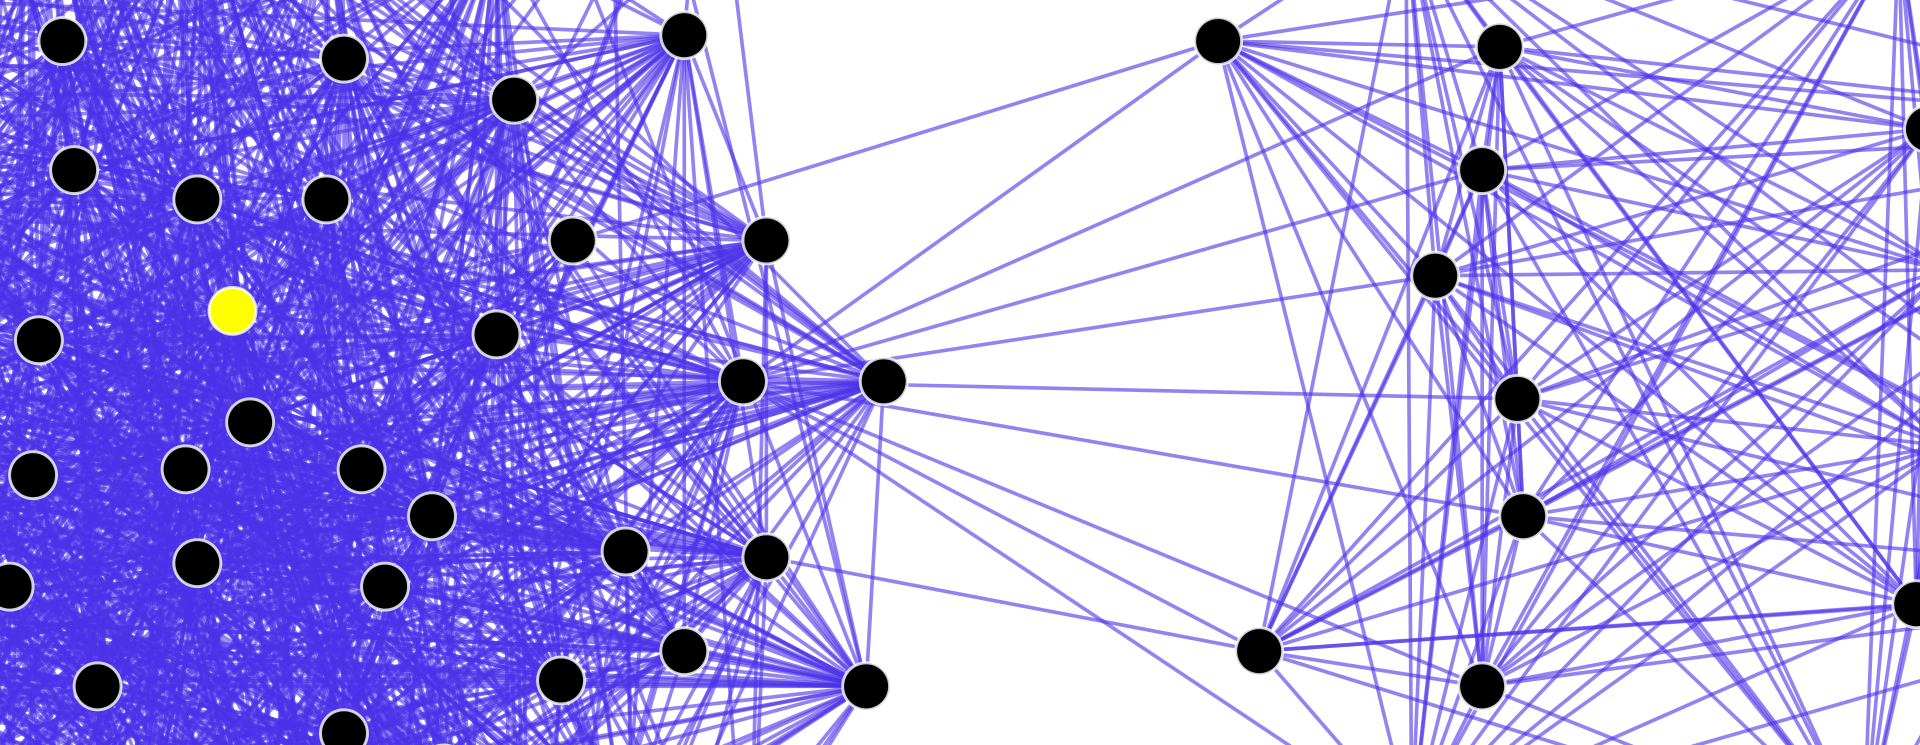

Examples:
* Social 
* Transportation

Model relationship between entities

Insights:
 * Important entities : influencers in social network
 * Pathfinding: most efficient transport path
 * Clustering: finding communities
 
 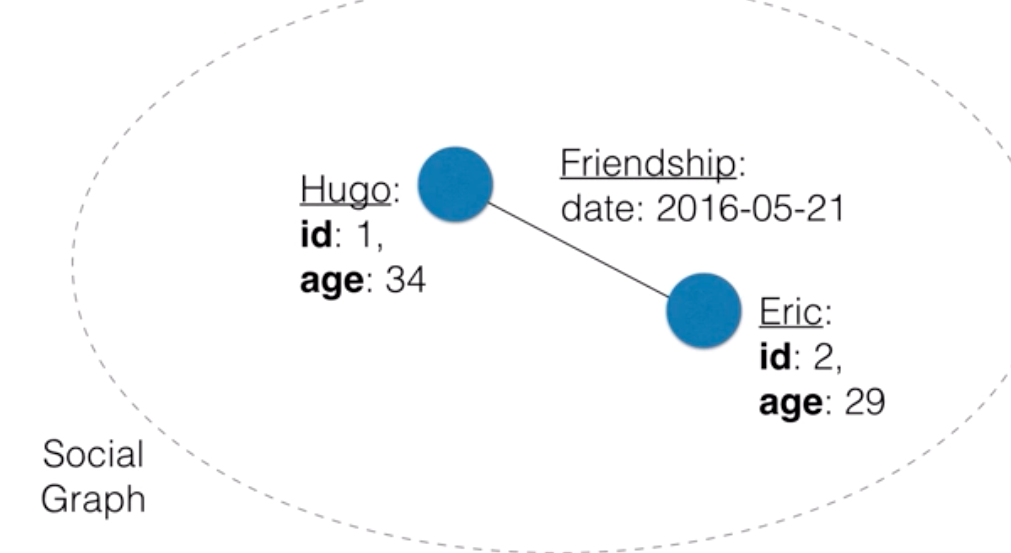
 

In [30]:
import matplotlib.pyplot as plt
%matplotlib auto # moved up


UsageError: unrecognized arguments: # moved up


<p id ='Wian'><p>
### What is a network?

In [31]:
import networkx as nx


In [32]:
G = nx.Graph()
G.add_nodes_from([1,2,3])
print(G.nodes())

[1, 2, 3]


In [33]:
G.add_edge(1, 2)
print(G.edges())

[(1, 2)]


/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


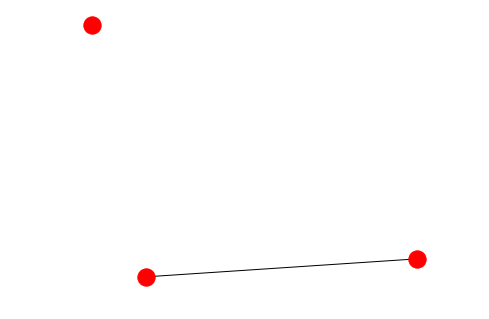

In [34]:
nx.draw(G)
import matplotlib.pyplot as plt
plt.show()

<p id ='BoNAuTn'><p>
### Basics of NetworkX API, using Twitter network

In [148]:
G = nx.read_gpickle("./data/ego-twitter.p")

In [149]:
len(G.nodes())

23369

In [150]:
type(G.edges(data=True))

networkx.classes.reportviews.OutEdgeDataView

In [153]:
T_sub = nx.Graph()


In [154]:
T_sub.add_nodes_from(list(G.nodes())[:48])

In [155]:
T_sub.edges()

EdgeView([])

In [156]:
T_sub.add_edges_from(list(G.edges())[:47])

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


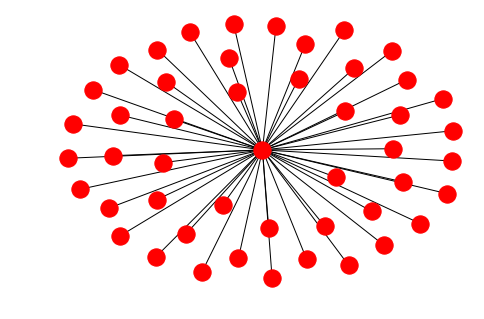

In [157]:
nx.draw(T_sub)
plt.show()

<p id ='BdoanuN'><p>
### Basic drawing of a network using NetworkX

In [44]:
T_sub = [1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

In [164]:
T = G.subgraph(T_sub)

In [160]:
import datetime

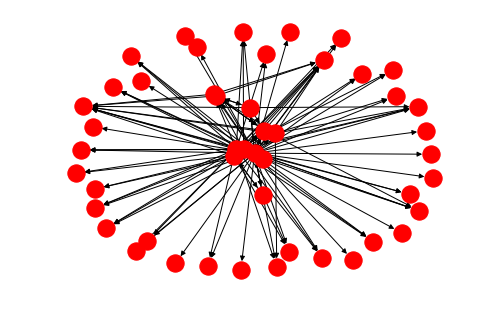

In [167]:
nx.draw(T)
plt.show()

<p id ='Qoag'><p>
### Queries on a graph

In [171]:
# Use list comprehension to get nodes of interest:
noi = [n for n,d in G.nodes(data=True) if d['occupation']=='scientist']


In [172]:
# Use a list comprehension to get. the edge of interest: eoi
eoi  = [(u,v) for u, v, d in G.edges(data=True) if d['date']<datetime.date(2009,1, 1)]

<p id ='Tog'><p>
### Types of graphs

<p id ='Ctusoag'><p>
### Checking the un/directed status of a graph

In [173]:
type(G)

networkx.classes.digraph.DiGraph

<p id ='Sawoe'><p>
### Specifying a weight on edges

In [174]:
G.edges[1, 10]

{'date': datetime.date(2012, 9, 8)}

In [175]:
G.edges[1, 10]['weight']  =2

In [176]:
G.edges[1, 10]

{'date': datetime.date(2012, 9, 8), 'weight': 2}

In [177]:
for u,v, d in G.edges(data= True):
    if 293 in [u, v]:
        print('########')
        G.edges[u, v]
        G.edges[u, v]['weight']= 1.1

########


<p id ='Cwtasitg'><p>
### Checking whether there are self-loops in the graph
NetworkX also allows edges that begin and end on the same node; while this would be non-intuitive for a social network graph, it is useful to model data such as trip networks, in which individuals begin at one location and end in another.

In [178]:
G.number_of_selfloops()

42

In [179]:
def find_selfloop_nodes(G):
    """
    Find all nodes that have self-loops in the graph
    """
    # Iterate over all the edges of G
    nodes_in_selfloops = []
    for u, v in G.edges():
        # Check if node u and node v are the same
        if u ==v:
            nodes_in_selfloops.append(u)
    return nodes_in_selfloops       

In [60]:
# Check whether number of self loops equals the number of nodes in self loops
assert T.number_of_selfloops() == len(find_selfloop_nodes(T))

<p id ='Nv'><p>
### Network visualization

In [184]:
import nxviz as nv

<p id ='VuMp'><p>
### Visualizing using Matrix plots

In [189]:
l = [19, 35, 36, 75, 154, 594, 595, 604, 613, 667, 726, 762, 897, 905, 969, 1200, 1327, 1338, 1369, 1696, 1700, 1711, 1717, 1981, 2311, 2315, 2338, 2378, 2385, 2409, 2463, 2480, 2488, 2584, 2625, 2639, 2658, 3086, 3230, 3265, 3289, 3531, 3534, 3632, 3724, 3728, 3931, 3985, 4032, 4087, 4183, 4317, 4328, 4461, 4469, 4517, 4732, 4755, 4776, 4800, 4811, 4816, 5346, 5439, 5590, 5613, 5649, 5709, 5717, 5729, 5810, 5851, 6264, 6394, 6421, 6511, 6533, 6581, 6658, 6697, 6795, 6833, 6996, 7045, 7062, 7383, 7505, 7519, 7555, 7741, 7742, 7884, 7886, 8033, 8093, 8182, 9077, 9691, 9933, 9942, 9967, 10373, 10375, 10378, 10981, 10983, 10994, 11055, 11061, 11349, 11547, 11555, 11558, 11738, 11753, 11788, 11822, 12162, 12245, 12262, 12520, 12530, 12575, 13257, 13471, 13726, 14113, 14124, 14227, 14558, 14613, 14677, 14833, 14853, 14901, 14910, 14916, 14920, 14927, 14957, 15310, 15334, 15345, 15530, 15567, 15983, 16597, 16614, 17131, 17136, 17202, 17744, 17769, 17794, 18333, 18352, 18478, 18510, 18561, 18566, 18917, 19024, 19182, 19316, 19409, 19470, 19787, 20078, 20436, 20446, 20499, 20633, 20655, 20756, 20971, 21054, 21231, 21478, 21622, 21970, 21986, 22008, 22046, 22184, 22257, 22588]

In [190]:
T = G.subgraph(l)
len(T.nodes())

186

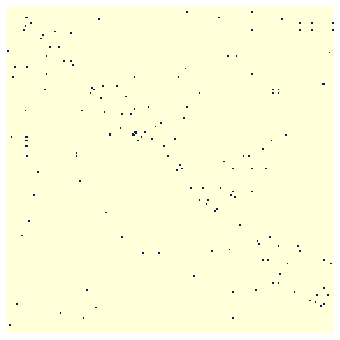

In [191]:
m = nv.MatrixPlot(T)
m.draw()


In [192]:
# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)
A


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [193]:
# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())
T_conv

In [194]:
# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

<p id ='VuCp'><p>
### Visualizing using Circos plots

In [195]:
from nxviz import CircosPlot

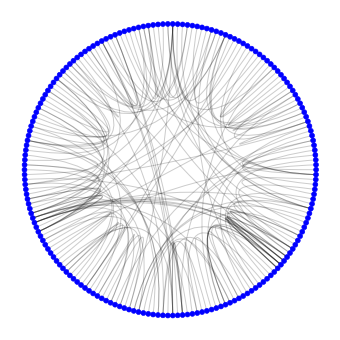

In [196]:
# Create the CircosPlot object: c
c  = CircosPlot(T)
c.draw()


<p id ='VuAp'><p>
### Visualizing using Arc plots

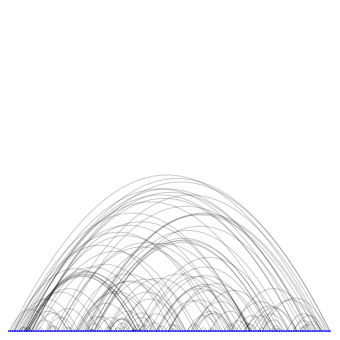

In [197]:
# Create the un-customized ArcPlot object: a
a = nv.ArcPlot(T)
a.draw()


# Important nodes


Techniques to determine which nodes are important
* Degree Centrality
* Between Centrality


<p id ='Dc'><p>
### Degree centrality
    
Examples of nodes with high degree centrality:
* Twitter Broadcasters
* Airport transportation hubs
* Disease super-spreaders


<p id ='Cnonfen'><p>
### Compute number of neighbors for each node

In [198]:
list(G.neighbors(1))[:20]


[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

Our job in this exercise is to write a function that returns all nodes that have m neighbors.

In [199]:
def nodes_with_m_neighbours(G, m):
    """
    Return all nodes in graph G that have m neighbours
    """
    nodes = set()
    # Iterate over all nodes in G
    for n in G.nodes():
        # Check if the number of neighbours of n matches m
        if len(list(G.neighbors(n))) ==m:
            # Add node n to the set
            nodes.add(n)
    return nodes 

In [73]:
# Compute and print all nodes in T that have 6 neighbours
six_nbrs = nodes_with_m_neighbours(G, 6)
six_nbrs


{64,
 475,
 1374,
 1803,
 2927,
 3880,
 4261,
 4725,
 5420,
 6112,
 6161,
 6862,
 9186,
 9689,
 10149,
 11276,
 11279,
 11764,
 14539,
 14898,
 14956,
 16681,
 17762,
 20430,
 22533}

In [74]:
for n in G.nodes():
    print(len(list(G.neighbors(n))))

47
0
0
0
0
0
0
0
0
0
0
0
0
0
17
0
10
27
0
0
0
0
0
0
0
0
34
0
0
0
0
0
60
0
11
4
0
12
0
0
56
53
0
30
0
0
0
0
12
0
0
0
0
0
0
0
0
0
0
0
0
18
6
0
0
0
0
0
33
0
0
0
0
39
8
0
0
0
0
0
0
0
9
0
0
0
0
0
0
0
0
0
39
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14
0
0
0
0
0
0
0
0
0
0
0
0
0
0
16
0
26
0
5
0
0
0
0
0
0
0
24
0
0
0
0
23
0
0
0
0
0
0
0
0
0
0
0
0
24
7
0
0
0
0
0
0
0
1
0
4
0
0
0
0
23
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
12
0
0
0
0
0
0
0
0
0
0
0
0
95
0
0
0
0
0
0
0
0
0
0
0
0
7
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
30
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
56
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
221
0
18
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
136
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
33
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
6
0
0
0
0
0
0
0
0
0
0

0
0
0
0
0
9
0
0
0
0
0
0
0
41
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
18
0
35
0
0
0
0
0
0
0
0
0
0
13
0
0
0
0
13
0
0
0
0
0
1
103
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
33
0
0
0
0
0
0
0
0
5
0
0
0
0
0
88
0
20
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
0
0
0
14
0
0
0
0
0
0
0
0
7
0
0
0
0
4
0
0
10
17
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
9
0
0
0
0
9
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
21
40
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
50
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
53
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
11
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
57
0
0
0
0
0
0
0
0
0
0
0
0
41
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
17
0
29
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
9
0
0
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
41
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
26
0
0
21
0
47
0
0
0
0
0
0
0
25
37
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
57
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
6
0
15
0
0
0
0
13
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
112
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
10
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
58
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
39
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
42
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
190
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
12
0
0
33
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
85
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
57
0
7
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
0
0
59
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


0
0
0
0
0
0
0
0
156
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
14
0
0
0
0
1
0
0
0
0
0
0
0
0
0
40
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
7
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
3
0
0
28
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
85
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
19
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5
0
85
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
10
0
0
0
0
0
44
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


<p id ='Cdd'><p>
### Compute degree distribution
The number of neighbors that a node has is called its "degree", and it's possible to compute the degree distribution across the entire graph. 


<p id ='Dcd'><p>
### Degree centrality distribution
The degree of a node is the number of neighbors that it has. The degree centrality is the number of neighbors divided by all possible neighbors that it could have. Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.



In [75]:
degrees  = [len(list(G.neighbors(n))) for n in G.nodes()]

In [76]:
degrees2 = [i for i in degrees if i!= 0]
len(degrees2)

978

In [77]:
# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G)
deg_cent

{1: 0.0025676138308798357,
 3: 0.00012838069154399176,
 4: 4.279356384799726e-05,
 5: 0.0005991098938719616,
 6: 0.0002995549469359808,
 7: 0.0002995549469359808,
 8: 0.0002567613830879835,
 9: 0.0002567613830879835,
 10: 8.558712769599452e-05,
 11: 0.00034234851078397807,
 12: 0.0002139678192399863,
 13: 8.558712769599452e-05,
 14: 0.00017117425539198904,
 15: 0.0002567613830879835,
 16: 0.0012410133515919205,
 17: 0.00034234851078397807,
 18: 0.0011126326600479288,
 19: 0.0012410133515919205,
 20: 0.00034234851078397807,
 21: 0.0002567613830879835,
 22: 4.279356384799726e-05,
 23: 4.279356384799726e-05,
 24: 0.0018401232454638822,
 25: 8.558712769599452e-05,
 26: 4.279356384799726e-05,
 27: 0.0002139678192399863,
 28: 0.001497774734679904,
 29: 0.00038514207463197534,
 30: 0.0002995549469359808,
 31: 0.0006419034577199589,
 32: 4.279356384799726e-05,
 33: 8.558712769599452e-05,
 34: 0.00265320095857583,
 35: 0.001968503937007874,
 36: 0.0029099623416638134,
 37: 0.0021824717562478604

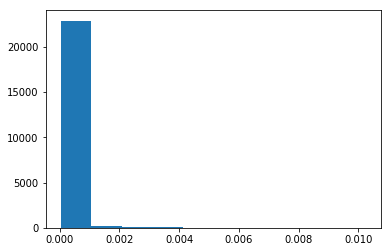

In [78]:
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()


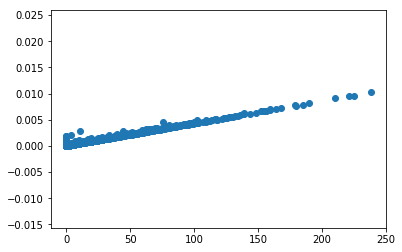

In [79]:
plt.scatter(degrees, list(deg_cent.values()))

<p id ='Ga'><p>
### Graph algorithms
Path finding is important for:
* Optimization: e.g. shortest transport path
* Modeling: e.g. disease spread, information passing

Find the shortest path between yellow point and red point
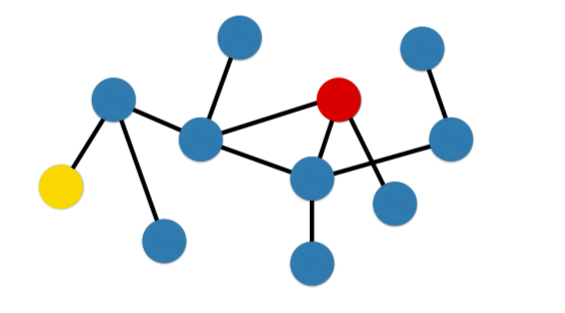


<p id ='SPI'><p>
### Shortest Path I
One algorithm for path-finding between two nodes is the "breadth-first search" (BFS) algorithm. In a BFS algorithm, you start from a particular node and iteratively search through its neighbors and neighbors' neighbors until you find the destination node.

In [80]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]

    for node in queue:
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])

        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

<p id ='Bc'><p>
### Betweenness centrality
Applications of Betweeness Centrality
* **Bridge** between liberal and conservative learning twitter users.
* Critical Information transfer links.
    
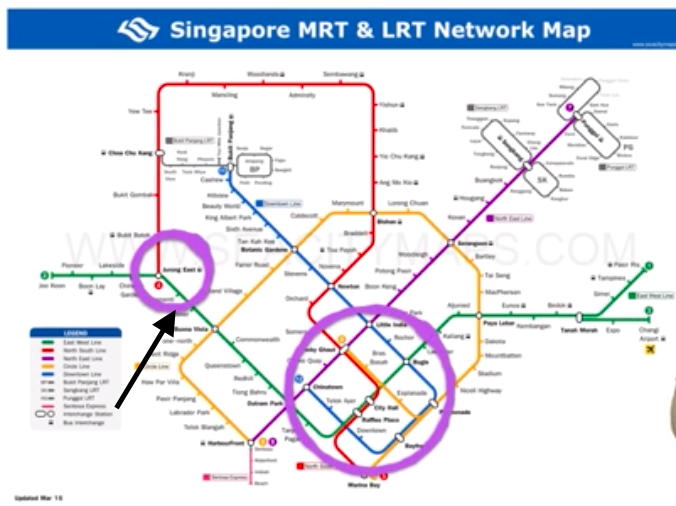

Betweeness centrality =num. shortest path through the node divided by all possible shortest paths

<p id ='Nbcoasn'><p>
### NetworkX betweenness centrality on a social network

In [81]:
import datetime

In [205]:
T = G.subgraph((1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49))

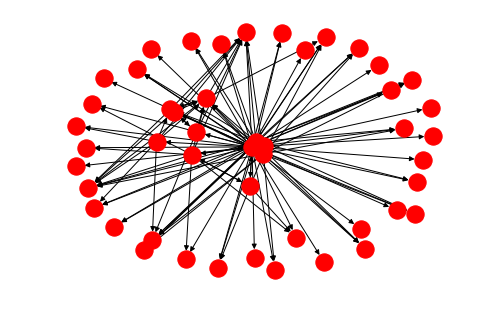

In [206]:
nx.draw(T)
plt.show()

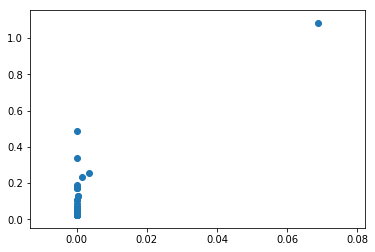

In [207]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(T)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(T)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(list(bet_cen.values()), list(deg_cen.values()))

# Display the plot
plt.show()

<p id ='Dd-Tn'><p>
### Deep dive - Twitter network - Degree Centrality
First, you're going to find the nodes that can broadcast messages very efficiently to lots of people one degree of separation away.

In [128]:
def find_nodes_with_highest_deg_cent(G):
    deg_cent = nx.degree_centrality(G)
    # Compute the maximum degree centrality
    max_dc = max(list(deg_cent.values()))
    nodes = set()
    for k, v in deg_cent.items():
        # Check if the current value has maximum degree centrality
        if v == max_dc:
            nodes.add(k)
    return nodes
    

In [129]:
max(list(nx.degree_centrality(G).values()))

0.010227661759671346

In [132]:
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(G)
print(top_dc)

{11824}


In [131]:
G.nodes[11824]

{'category': 'P', 'occupation': 'celebrity'}

<p id ='Dd-TnpI'><p>
### Deep dive - Twitter network part II - Betweeness Centrality

In [136]:
T = nx.Graph()
T.add_nodes_from({1: {'category': 'I', 'occupation': 'politician'}, 3: {'category': 'D', 'occupation': 'celebrity'}, 4: {'category': 'I', 'occupation': 'politician'}, 5: {'category': 'I', 'occupation': 'scientist'}, 6: {'category': 'D', 'occupation': 'politician'}, 7: {'category': 'I', 'occupation': 'politician'}, 8: {'category': 'I', 'occupation': 'celebrity'}, 9: {'category': 'D', 'occupation': 'scientist'}, 10: {'category': 'D', 'occupation': 'celebrity'}, 11: {'category': 'I', 'occupation': 'celebrity'}, 12: {'category': 'I', 'occupation': 'celebrity'}, 13: {'category': 'P', 'occupation': 'scientist'}, 14: {'category': 'D', 'occupation': 'celebrity'}, 15: {'category': 'P', 'occupation': 'scientist'}, 16: {'category': 'P', 'occupation': 'politician'}, 17: {'category': 'I', 'occupation': 'scientist'}, 18: {'category': 'I', 'occupation': 'celebrity'}, 19: {'category': 'I', 'occupation': 'scientist'}, 20: {'category': 'P', 'occupation': 'scientist'}, 21: {'category': 'I', 'occupation': 'celebrity'}, 22: {'category': 'D', 'occupation': 'scientist'}, 23: {'category': 'D', 'occupation': 'scientist'}, 24: {'category': 'P', 'occupation': 'politician'}, 25: {'category': 'I', 'occupation': 'celebrity'}, 26: {'category': 'P', 'occupation': 'celebrity'}, 27: {'category': 'D', 'occupation': 'scientist'}, 28: {'category': 'P', 'occupation': 'celebrity'}, 29: {'category': 'I', 'occupation': 'celebrity'}, 30: {'category': 'P', 'occupation': 'scientist'}, 31: {'category': 'D', 'occupation': 'scientist'}, 32: {'category': 'P', 'occupation': 'politician'}, 33: {'category': 'I', 'occupation': 'politician'}, 34: {'category': 'D', 'occupation': 'celebrity'}, 35: {'category': 'P', 'occupation': 'scientist'}, 36: {'category': 'D', 'occupation': 'scientist'}, 37: {'category': 'I', 'occupation': 'scientist'}, 38: {'category': 'P', 'occupation': 'celebrity'}, 39: {'category': 'D', 'occupation': 'celebrity'}, 40: {'category': 'I', 'occupation': 'celebrity'}, 41: {'category': 'I', 'occupation': 'celebrity'}, 42: {'category': 'P', 'occupation': 'scientist'}, 43: {'category': 'I', 'occupation': 'celebrity'}, 44: {'category': 'I', 'occupation': 'politician'}, 45: {'category': 'D', 'occupation': 'scientist'}, 46: {'category': 'I', 'occupation': 'politician'}, 47: {'category': 'I', 'occupation': 'celebrity'}, 48: {'category': 'P', 'occupation': 'celebrity'}, 49: {'category': 'P', 'occupation': 'politician'}})
T.add_edges_from([(1, 3, {'date': datetime.date(2012, 11, 16)}), (1, 4, {'date': datetime.date(2013, 6, 7)}), (1, 5, {'date': datetime.date(2009, 7, 27)}), (1, 6, {'date': datetime.date(2014, 12, 18)}), (1, 7, {'date': datetime.date(2010, 10, 18)}), (1, 8, {'date': datetime.date(2012, 4, 18)}), (1, 9, {'date': datetime.date(2007, 10, 14)}), (1, 10, {'date': datetime.date(2012, 9, 8)}), (1, 11, {'date': datetime.date(2010, 1, 6)}), (1, 12, {'date': datetime.date(2012, 12, 27)}), (1, 13, {'date': datetime.date(2008, 12, 18)}), (1, 14, {'date': datetime.date(2014, 5, 25)}), (1, 15, {'date': datetime.date(2009, 11, 12)}), (1, 16, {'date': datetime.date(2008, 8, 6)}), (1, 17, {'date': datetime.date(2007, 8, 11)}), (1, 18, {'date': datetime.date(2009, 10, 7)}), (1, 19, {'date': datetime.date(2008, 7, 24)}), (1, 20, {'date': datetime.date(2013, 11, 18)}), (1, 21, {'date': datetime.date(2011, 3, 28)}), (1, 22, {'date': datetime.date(2013, 3, 4)}), (1, 23, {'date': datetime.date(2012, 4, 20)}), (1, 24, {'date': datetime.date(2009, 6, 6)}), (1, 25, {'date': datetime.date(2013, 6, 18)}), (1, 26, {'date': datetime.date(2014, 11, 20)}), (1, 27, {'date': datetime.date(2007, 4, 28)}), (1, 28, {'date': datetime.date(2007, 2, 25)}), (1, 29, {'date': datetime.date(2014, 1, 23)}), (1, 30, {'date': datetime.date(2007, 10, 9)}), (1, 31, {'date': datetime.date(2009, 2, 17)}), (1, 32, {'date': datetime.date(2009, 10, 14)}), (1, 33, {'date': datetime.date(2010, 5, 19)}), (1, 34, {'date': datetime.date(2009, 12, 21)}), (1, 35, {'date': datetime.date(2014, 11, 16)}), (1, 36, {'date': datetime.date(2010, 2, 25)}), (1, 37, {'date': datetime.date(2010, 9, 23)}), (1, 38, {'date': datetime.date(2007, 4, 28)}), (1, 39, {'date': datetime.date(2008, 2, 26)}), (1, 40, {'date': datetime.date(2010, 5, 15)}), (1, 41, {'date': datetime.date(2009, 8, 12)}), (1, 42, {'date': datetime.date(2013, 1, 22)}), (1, 43, {'date': datetime.date(2011, 11, 14)}), (1, 44, {'date': datetime.date(2013, 4, 6)}), (1, 45, {'date': datetime.date(2008, 6, 22)}), (1, 46, {'date': datetime.date(2011, 8, 20)}), (1, 47, {'date': datetime.date(2014, 8, 3)}), (1, 48, {'date': datetime.date(2010, 3, 15)}), (1, 49, {'date': datetime.date(2007, 9, 2)}), (16, 18, {'date': datetime.date(2012, 1, 6)}), (16, 35, {'date': datetime.date(2014, 6, 4)}), (16, 36, {'date': datetime.date(2008, 10, 10)}), (16, 48, {'date': datetime.date(2014, 1, 27)}), (18, 16, {'date': datetime.date(2008, 8, 5)}), (18, 24, {'date': datetime.date(2009, 2, 4)}), (18, 35, {'date': datetime.date(2008, 12, 1)}), (18, 36, {'date': datetime.date(2013, 2, 6)}), (19, 5, {'date': datetime.date(2013, 6, 12)}), (19, 8, {'date': datetime.date(2010, 11, 5)}), (19, 11, {'date': datetime.date(2012, 4, 16)}), (19, 13, {'date': datetime.date(2012, 12, 13)}), (19, 15, {'date': datetime.date(2008, 12, 13)}), (19, 17, {'date': datetime.date(2007, 11, 11)}), (19, 20, {'date': datetime.date(2008, 11, 9)}), (19, 21, {'date': datetime.date(2007, 7, 23)}), (19, 24, {'date': datetime.date(2013, 12, 13)}), (19, 30, {'date': datetime.date(2012, 6, 6)}), (19, 31, {'date': datetime.date(2011, 1, 27)}), (19, 35, {'date': datetime.date(2014, 3, 3)}), (19, 36, {'date': datetime.date(2007, 10, 22)}), (19, 37, {'date': datetime.date(2008, 4, 20)}), (19, 48, {'date': datetime.date(2010, 12, 23)}), (28, 1, {'date': datetime.date(2014, 3, 28)}), (28, 5, {'date': datetime.date(2010, 12, 4)}), (28, 7, {'date': datetime.date(2011, 11, 21)}), (28, 8, {'date': datetime.date(2007, 6, 26)}), (28, 11, {'date': datetime.date(2011, 6, 21)}), (28, 14, {'date': datetime.date(2013, 12, 18)}), (28, 15, {'date': datetime.date(2014, 6, 3)}), (28, 17, {'date': datetime.date(2012, 10, 11)}), (28, 20, {'date': datetime.date(2012, 4, 15)}), (28, 21, {'date': datetime.date(2014, 4, 27)}), (28, 24, {'date': datetime.date(2013, 1, 27)}), (28, 25, {'date': datetime.date(2014, 5, 9)}), (28, 27, {'date': datetime.date(2007, 8, 9)}), (28, 29, {'date': datetime.date(2012, 4, 3)}), (28, 30, {'date': datetime.date(2007, 12, 2)}), (28, 31, {'date': datetime.date(2008, 6, 1)}), (28, 35, {'date': datetime.date(2012, 11, 16)}), (28, 36, {'date': datetime.date(2012, 9, 26)}), (28, 37, {'date': datetime.date(2014, 11, 12)}), (28, 44, {'date': datetime.date(2007, 11, 18)}), (28, 48, {'date': datetime.date(2008, 5, 25)}), (28, 49, {'date': datetime.date(2011, 12, 19)}), (36, 5, {'date': datetime.date(2013, 4, 7)}), (36, 24, {'date': datetime.date(2009, 4, 23)}), (36, 35, {'date': datetime.date(2008, 12, 1)}), (36, 37, {'date': datetime.date(2013, 4, 2)}), (37, 24, {'date': datetime.date(2008, 6, 27)}), (37, 35, {'date': datetime.date(2014, 5, 7)}), (37, 36, {'date': datetime.date(2014, 5, 13)}), (39, 1, {'date': datetime.date(2007, 4, 8)}), (39, 24, {'date': datetime.date(2007, 1, 27)}), (39, 33, {'date': datetime.date(2011, 9, 5)}), (39, 35, {'date': datetime.date(2007, 6, 17)}), (39, 36, {'date': datetime.date(2014, 12, 6)}), (39, 38, {'date': datetime.date(2009, 5, 15)}), (39, 40, {'date': datetime.date(2011, 6, 3)}), (39, 41, {'date': datetime.date(2009, 10, 5)}), (39, 45, {'date': datetime.date(2011, 4, 1)}), (42, 1, {'date': datetime.date(2013, 3, 9)}), (43, 24, {'date': datetime.date(2014, 2, 12)}), (43, 29, {'date': datetime.date(2014, 6, 4)}), (43, 35, {'date': datetime.date(2009, 6, 10)}), (43, 36, {'date': datetime.date(2013, 12, 17)}), (43, 37, {'date': datetime.date(2012, 1, 22)}), (43, 47, {'date': datetime.date(2014, 12, 21)}), (43, 48, {'date': datetime.date(2013, 1, 28)}), (45, 1, {'date': datetime.date(2010, 1, 18)}), (45, 39, {'date': datetime.date(2011, 1, 12)}), (45, 41, {'date': datetime.date(2009, 9, 7)})])

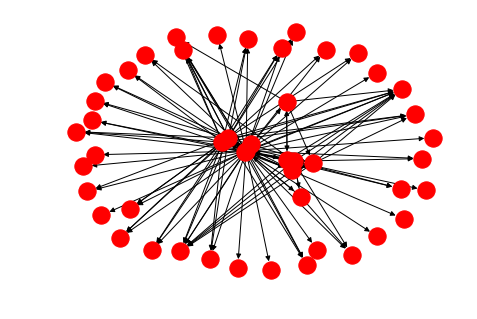

In [208]:
nx.draw(T)
plt.show()

In [209]:
def find_node_with_highest_bet_cent(G):
    # Compute the betweeness centrality
    bet_cent = nx.betweenness_centrality(G)
    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))
    print(max_bc)
    nodes = set()
    for k, v in bet_cent.items():
        # Check if the current value has maximum betweeness centrality
        if v == max_bc:
            nodes.add(k)
    return nodes

In [210]:
# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(T)
top_bc


0.06891766882516188


{1}

Fantastic, you have correctly identified that node 1 has the highest betweenness centrality!



In [211]:
for node in top_bc:
    assert nx.betweenness_centrality(T)[node] == max(nx.betweenness_centrality(T).values())

# Structures

<p id ='C&c'><p>
### Cliques & communities

<p id ='Itr'><p>
### Identifying triangle relationships
In the Twitter network, each node has an 'occupation' label associated with it, in which the Twitter user's work occupation is divided into celebrity, politician and scientist.

One potential application of triangle-finding algorithms is to find out whether users that have **similar occupations are more likely to be in a *clique* with one another**.



In [212]:
len(T.nodes())

48

In [213]:
from itertools import combinations

In [214]:
# combinations(iterable, n) returns combinations of size n from iterable
list(combinations([2, 1, 3],2))

[(2, 1), (2, 3), (1, 3)]

In [215]:
# combinations(iterable, n) returns combinations of size n from iterable
list(combinations(G.neighbors(1), 2))[:10]

[(3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13)]

In [177]:
def is_in_triangle(G, n):
    """
    Checks whether a node `n` in graph is in a triangle relationship or not.
    
    Returns a boolean
    """
    in_triangle = False
    # since n1, n2 are neighbours of n, if there is an edge b/w n1&n2 , n, n1 and n2 are in triagle relationship
    for n1, n2 in combinations(G.neighbors(n), 2):
        if G.has_edge(n1, n2):
            in_triangle = True
    return in_triangle
    

In [184]:
is_in_triangle(T, 5)

True

In [176]:
T.nodes()

NodeView((1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49))

<p id ='Fniit'><p>
### Finding nodes involved in triangles

In [194]:
def nodes_in_triangle(G, n):
    """
    Returns the node in a graph 'G' that are involved in triangle relation
    """
    triangle_nodes = set([n])
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):
            triangle_nodes.add(n1)
            triangle_nodes.add(n2)
    return triangle_nodes


In [196]:
len(nodes_in_triangle(T, 1))

35

<p id ='Fot'><p>
### Finding open triangles
Let us now move on to finding open triangles! Recall that they form the basis of friend recommendation systems; if "A" knows "B" and "A" knows "C", then it's probable that "B" also knows "C".
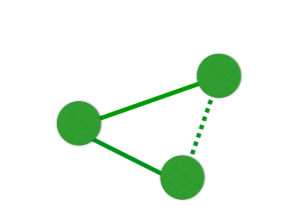


In [197]:
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbours of node 'n' in graph 'G' are in open triangle relationship  with node 'n'
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
       # Check if n1 and n2 do NOT have an edge between them
       if not G.has_edge(n1, n2):
            in_open_triangle  = True
            break
    return in_open_triangle

In [200]:
# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in T.nodes():
    # Check if the current node is in open triangle
    if node_in_open_triangle(T, n):
        # Increment the num_open_triangles
        num_open_triangles +=1
        


In [202]:
num_open_triangles

22

Excellent job! It looks like 22 nodes in graph T are in open triangles!

<p id ='Mc'><p>
### Maximal cliques
Maximal cliques are useful property of graph when finding communities
    
These three green nodes DO Not form Maximal Clique
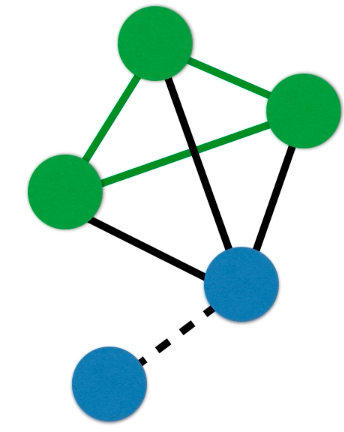
    -These four green nodes form Maximal clique
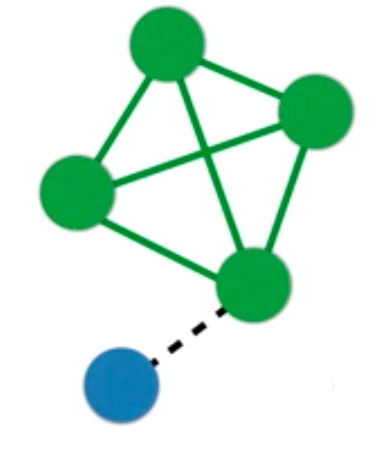
###    Example:
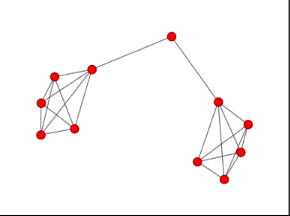
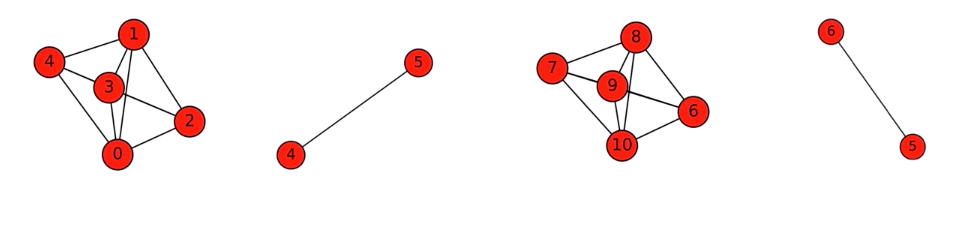

<p id ='Famcos'><p>
### Finding all maximal cliques of size n

In [213]:
def maximal_cliques(G, size):
    """
    Find all maximal cliques in graph 'G' that are of size 'size'
    """
    mcs = []
    
    for clique in nx.find_cliques(G):
        if len(clique) == size:
            mcs.append(clique)
    return mcs
    

In [215]:
assert len(maximal_cliques(T, 3)) == 33

<p id ='S'><p>
### Subgraphs
There may be times when you just want to analyze a subset of nodes in a network. To do so, you can copy them out into another graph object using `G.subgraph(nodes)`, which returns a new graph object (of the same type as the original graph) that is comprised of the iterable of nodes that was passed in.

<p id ='SI'><p>
### Subgraphs I

In [268]:
T = nx.Graph()
T.add_nodes_from({1: {'category': 'I', 'occupation': 'politician'}, 3: {'category': 'D', 'occupation': 'celebrity'}, 4: {'category': 'I', 'occupation': 'politician'}, 5: {'category': 'I', 'occupation': 'scientist'}, 6: {'category': 'D', 'occupation': 'politician'}, 7: {'category': 'I', 'occupation': 'politician'}, 8: {'category': 'I', 'occupation': 'celebrity'}, 9: {'category': 'D', 'occupation': 'scientist'}, 10: {'category': 'D', 'occupation': 'celebrity'}, 11: {'category': 'I', 'occupation': 'celebrity'}, 12: {'category': 'I', 'occupation': 'celebrity'}, 13: {'category': 'P', 'occupation': 'scientist'}, 14: {'category': 'D', 'occupation': 'celebrity'}, 15: {'category': 'P', 'occupation': 'scientist'}, 16: {'category': 'P', 'occupation': 'politician'}, 17: {'category': 'I', 'occupation': 'scientist'}, 18: {'category': 'I', 'occupation': 'celebrity'}, 19: {'category': 'I', 'occupation': 'scientist'}, 20: {'category': 'P', 'occupation': 'scientist'}, 21: {'category': 'I', 'occupation': 'celebrity'}, 22: {'category': 'D', 'occupation': 'scientist'}, 23: {'category': 'D', 'occupation': 'scientist'}, 24: {'category': 'P', 'occupation': 'politician'}, 25: {'category': 'I', 'occupation': 'celebrity'}, 26: {'category': 'P', 'occupation': 'celebrity'}, 27: {'category': 'D', 'occupation': 'scientist'}, 28: {'category': 'P', 'occupation': 'celebrity'}, 29: {'category': 'I', 'occupation': 'celebrity'}, 30: {'category': 'P', 'occupation': 'scientist'}, 31: {'category': 'D', 'occupation': 'scientist'}, 32: {'category': 'P', 'occupation': 'politician'}, 33: {'category': 'I', 'occupation': 'politician'}, 34: {'category': 'D', 'occupation': 'celebrity'}, 35: {'category': 'P', 'occupation': 'scientist'}, 36: {'category': 'D', 'occupation': 'scientist'}, 37: {'category': 'I', 'occupation': 'scientist'}, 38: {'category': 'P', 'occupation': 'celebrity'}, 39: {'category': 'D', 'occupation': 'celebrity'}, 40: {'category': 'I', 'occupation': 'celebrity'}, 41: {'category': 'I', 'occupation': 'celebrity'}, 42: {'category': 'P', 'occupation': 'scientist'}, 43: {'category': 'I', 'occupation': 'celebrity'}, 44: {'category': 'I', 'occupation': 'politician'}, 45: {'category': 'D', 'occupation': 'scientist'}, 46: {'category': 'I', 'occupation': 'politician'}, 47: {'category': 'I', 'occupation': 'celebrity'}, 48: {'category': 'P', 'occupation': 'celebrity'}, 49: {'category': 'P', 'occupation': 'politician'}})
T.add_edges_from([(1, 3, {'date': datetime.date(2012, 11, 16)}), (1, 4, {'date': datetime.date(2013, 6, 7)}), (1, 5, {'date': datetime.date(2009, 7, 27)}), (1, 6, {'date': datetime.date(2014, 12, 18)}), (1, 7, {'date': datetime.date(2010, 10, 18)}), (1, 8, {'date': datetime.date(2012, 4, 18)}), (1, 9, {'date': datetime.date(2007, 10, 14)}), (1, 10, {'date': datetime.date(2012, 9, 8)}), (1, 11, {'date': datetime.date(2010, 1, 6)}), (1, 12, {'date': datetime.date(2012, 12, 27)}), (1, 13, {'date': datetime.date(2008, 12, 18)}), (1, 14, {'date': datetime.date(2014, 5, 25)}), (1, 15, {'date': datetime.date(2009, 11, 12)}), (1, 16, {'date': datetime.date(2008, 8, 6)}), (1, 17, {'date': datetime.date(2007, 8, 11)}), (1, 18, {'date': datetime.date(2009, 10, 7)}), (1, 19, {'date': datetime.date(2008, 7, 24)}), (1, 20, {'date': datetime.date(2013, 11, 18)}), (1, 21, {'date': datetime.date(2011, 3, 28)}), (1, 22, {'date': datetime.date(2013, 3, 4)}), (1, 23, {'date': datetime.date(2012, 4, 20)}), (1, 24, {'date': datetime.date(2009, 6, 6)}), (1, 25, {'date': datetime.date(2013, 6, 18)}), (1, 26, {'date': datetime.date(2014, 11, 20)}), (1, 27, {'date': datetime.date(2007, 4, 28)}), (1, 28, {'date': datetime.date(2014, 3, 28)}), (1, 29, {'date': datetime.date(2014, 1, 23)}), (1, 30, {'date': datetime.date(2007, 10, 9)}), (1, 31, {'date': datetime.date(2009, 2, 17)}), (1, 32, {'date': datetime.date(2009, 10, 14)}), (1, 33, {'date': datetime.date(2010, 5, 19)}), (1, 34, {'date': datetime.date(2009, 12, 21)}), (1, 35, {'date': datetime.date(2014, 11, 16)}), (1, 36, {'date': datetime.date(2010, 2, 25)}), (1, 37, {'date': datetime.date(2010, 9, 23)}), (1, 38, {'date': datetime.date(2007, 4, 28)}), (1, 39, {'date': datetime.date(2007, 4, 8)}), (1, 40, {'date': datetime.date(2010, 5, 15)}), (1, 41, {'date': datetime.date(2009, 8, 12)}), (1, 42, {'date': datetime.date(2013, 3, 9)}), (1, 43, {'date': datetime.date(2011, 11, 14)}), (1, 44, {'date': datetime.date(2013, 4, 6)}), (1, 45, {'date': datetime.date(2010, 1, 18)}), (1, 46, {'date': datetime.date(2011, 8, 20)}), (1, 47, {'date': datetime.date(2014, 8, 3)}), (1, 48, {'date': datetime.date(2010, 3, 15)}), (1, 49, {'date': datetime.date(2007, 9, 2)}), (5, 19, {'date': datetime.date(2013, 6, 12)}), (5, 28, {'date': datetime.date(2010, 12, 4)}), (5, 36, {'date': datetime.date(2013, 4, 7)}), (7, 28, {'date': datetime.date(2011, 11, 21)}), (8, 19, {'date': datetime.date(2010, 11, 5)}), (8, 28, {'date': datetime.date(2007, 6, 26)}), (11, 19, {'date': datetime.date(2012, 4, 16)}), (11, 28, {'date': datetime.date(2011, 6, 21)}), (13, 19, {'date': datetime.date(2012, 12, 13)}), (14, 28, {'date': datetime.date(2013, 12, 18)}), (15, 19, {'date': datetime.date(2008, 12, 13)}), (15, 28, {'date': datetime.date(2014, 6, 3)}), (16, 18, {'date': datetime.date(2008, 8, 5)}), (16, 35, {'date': datetime.date(2014, 6, 4)}), (16, 36, {'date': datetime.date(2008, 10, 10)}), (16, 48, {'date': datetime.date(2014, 1, 27)}), (17, 19, {'date': datetime.date(2007, 11, 11)}), (17, 28, {'date': datetime.date(2012, 10, 11)}), (18, 24, {'date': datetime.date(2009, 2, 4)}), (18, 35, {'date': datetime.date(2008, 12, 1)}), (18, 36, {'date': datetime.date(2013, 2, 6)}), (19, 20, {'date': datetime.date(2008, 11, 9)}), (19, 21, {'date': datetime.date(2007, 7, 23)}), (19, 24, {'date': datetime.date(2013, 12, 13)}), (19, 30, {'date': datetime.date(2012, 6, 6)}), (19, 31, {'date': datetime.date(2011, 1, 27)}), (19, 35, {'date': datetime.date(2014, 3, 3)}), (19, 36, {'date': datetime.date(2007, 10, 22)}), (19, 37, {'date': datetime.date(2008, 4, 20)}), (19, 48, {'date': datetime.date(2010, 12, 23)}), (20, 28, {'date': datetime.date(2012, 4, 15)}), (21, 28, {'date': datetime.date(2014, 4, 27)}), (24, 28, {'date': datetime.date(2013, 1, 27)}), (24, 36, {'date': datetime.date(2009, 4, 23)}), (24, 37, {'date': datetime.date(2008, 6, 27)}), (24, 39, {'date': datetime.date(2007, 1, 27)}), (24, 43, {'date': datetime.date(2014, 2, 12)}), (25, 28, {'date': datetime.date(2014, 5, 9)}), (27, 28, {'date': datetime.date(2007, 8, 9)}), (28, 29, {'date': datetime.date(2012, 4, 3)}), (28, 30, {'date': datetime.date(2007, 12, 2)}), (28, 31, {'date': datetime.date(2008, 6, 1)}), (28, 35, {'date': datetime.date(2012, 11, 16)}), (28, 36, {'date': datetime.date(2012, 9, 26)}), (28, 37, {'date': datetime.date(2014, 11, 12)}), (28, 44, {'date': datetime.date(2007, 11, 18)}), (28, 48, {'date': datetime.date(2008, 5, 25)}), (28, 49, {'date': datetime.date(2011, 12, 19)}), (29, 43, {'date': datetime.date(2014, 6, 4)}), (33, 39, {'date': datetime.date(2011, 9, 5)}), (35, 36, {'date': datetime.date(2008, 12, 1)}), (35, 37, {'date': datetime.date(2014, 5, 7)}), (35, 39, {'date': datetime.date(2007, 6, 17)}), (35, 43, {'date': datetime.date(2009, 6, 10)}), (36, 37, {'date': datetime.date(2014, 5, 13)}), (36, 39, {'date': datetime.date(2014, 12, 6)}), (36, 43, {'date': datetime.date(2013, 12, 17)}), (37, 43, {'date': datetime.date(2012, 1, 22)}), (38, 39, {'date': datetime.date(2009, 5, 15)}), (39, 40, {'date': datetime.date(2011, 6, 3)}), (39, 41, {'date': datetime.date(2009, 10, 5)}), (39, 45, {'date': datetime.date(2011, 1, 12)}), (41, 45, {'date': datetime.date(2009, 9, 7)}), (43, 47, {'date': datetime.date(2014, 12, 21)}), (43, 48, {'date': datetime.date(2013, 1, 28)})])

[(1, {}),
 (3, {}),
 (4, {}),
 (5, {}),
 (6, {}),
 (7, {}),
 (8, {}),
 (9, {}),
 (10, {}),
 (11, {}),
 (12, {}),
 (13, {}),
 (14, {}),
 (15, {}),
 (16, {}),
 (17, {}),
 (18, {}),
 (19, {}),
 (20, {}),
 (21, {}),
 (22, {}),
 (23, {}),
 (24, {}),
 (25, {}),
 (26, {}),
 (27, {}),
 (28, {}),
 (29, {}),
 (30, {}),
 (31, {}),
 (32, {}),
 (33, {}),
 (34, {}),
 (35, {}),
 (36, {}),
 (37, {}),
 (38, {}),
 (39, {}),
 (40, {}),
 (41, {}),
 (42, {}),
 (43, {}),
 (44, {}),
 (45, {}),
 (46, {}),
 (47, {}),
 (48, {}),
 (49, {})]

In [254]:
nodes_of_interest = [29, 38, 42]

In [259]:
def get_nodes_and_nbrs(G, node_of_interest):
    """
    Returns a subgraph of the graph 'G' with only 'node of interest' and their neighbours
    """
    nodes_to_draw = []
    # Iterate over the node of interest
    for n in node_of_interest:
        # Append the node of interest to node_to_draw
        nodes_to_draw.append(n)
        # Append the neighbours of node to nodes_to_draw
        # Iterate over all the neighbors of node n
        for nbr in G.neighbors(n):

            # Append the neighbors of n to nodes_to_draw
            nodes_to_draw.append(nbr)
    return G.subgraph(nodes_to_draw)

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


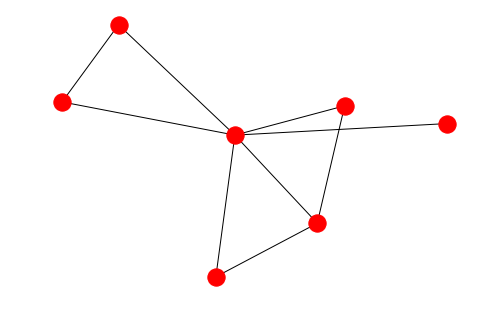

In [262]:
# Extract the subgraph with the nodes of interest: T_draw
T_draw = get_nodes_and_nbrs(T, nodes_of_interest)

# Draw the subgraph to the screen
nx.draw(T_draw)
plt.show()

In [263]:
T_draw.nodes()

NodeView((1, 38, 39, 42, 43, 28, 29))

<p id ='SI'><p>
### Subgraphs II

In [270]:
T = nx.Graph()

In [271]:
T.add_nodes_from({1: {'category': 'I', 'occupation': 'politician'}, 3: {'category': 'D', 'occupation': 'celebrity'}, 4: {'category': 'I', 'occupation': 'politician'}, 5: {'category': 'I', 'occupation': 'scientist'}, 6: {'category': 'D', 'occupation': 'politician'}, 7: {'category': 'I', 'occupation': 'politician'}, 8: {'category': 'I', 'occupation': 'celebrity'}, 9: {'category': 'D', 'occupation': 'scientist'}, 10: {'category': 'D', 'occupation': 'celebrity'}, 11: {'category': 'I', 'occupation': 'celebrity'}, 12: {'category': 'I', 'occupation': 'celebrity'}, 13: {'category': 'P', 'occupation': 'scientist'}, 14: {'category': 'D', 'occupation': 'celebrity'}, 15: {'category': 'P', 'occupation': 'scientist'}, 16: {'category': 'P', 'occupation': 'politician'}, 17: {'category': 'I', 'occupation': 'scientist'}, 18: {'category': 'I', 'occupation': 'celebrity'}, 19: {'category': 'I', 'occupation': 'scientist'}, 20: {'category': 'P', 'occupation': 'scientist'}, 21: {'category': 'I', 'occupation': 'celebrity'}, 22: {'category': 'D', 'occupation': 'scientist'}, 23: {'category': 'D', 'occupation': 'scientist'}, 24: {'category': 'P', 'occupation': 'politician'}, 25: {'category': 'I', 'occupation': 'celebrity'}, 26: {'category': 'P', 'occupation': 'celebrity'}, 27: {'category': 'D', 'occupation': 'scientist'}, 28: {'category': 'P', 'occupation': 'celebrity'}, 29: {'category': 'I', 'occupation': 'celebrity'}, 30: {'category': 'P', 'occupation': 'scientist'}, 31: {'category': 'D', 'occupation': 'scientist'}, 32: {'category': 'P', 'occupation': 'politician'}, 33: {'category': 'I', 'occupation': 'politician'}, 34: {'category': 'D', 'occupation': 'celebrity'}, 35: {'category': 'P', 'occupation': 'scientist'}, 36: {'category': 'D', 'occupation': 'scientist'}, 37: {'category': 'I', 'occupation': 'scientist'}, 38: {'category': 'P', 'occupation': 'celebrity'}, 39: {'category': 'D', 'occupation': 'celebrity'}, 40: {'category': 'I', 'occupation': 'celebrity'}, 41: {'category': 'I', 'occupation': 'celebrity'}, 42: {'category': 'P', 'occupation': 'scientist'}, 43: {'category': 'I', 'occupation': 'celebrity'}, 44: {'category': 'I', 'occupation': 'politician'}, 45: {'category': 'D', 'occupation': 'scientist'}, 46: {'category': 'I', 'occupation': 'politician'}, 47: {'category': 'I', 'occupation': 'celebrity'}, 48: {'category': 'P', 'occupation': 'celebrity'}, 49: {'category': 'P', 'occupation': 'politician'}})

In [272]:
T.nodes(data = True)

NodeDataView({1: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}, 12: {}, 13: {}, 14: {}, 15: {}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {}, 21: {}, 22: {}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {}, 33: {}, 34: {}, 35: {}, 36: {}, 37: {}, 38: {}, 39: {}, 40: {}, 41: {}, 42: {}, 43: {}, 44: {}, 45: {}, 46: {}, 47: {}, 48: {}, 49: {}})

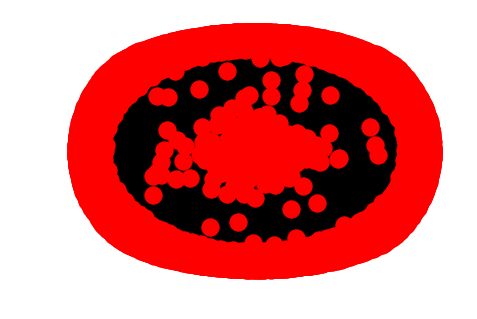

In [280]:
# Extract the nodes of interest: nodes
nodes = [n for n, d in G.nodes(data=True) if d['occupation'] == 'celebrity']

# Create the set of nodes: nodeset
nodeset = set(nodes)

# Iterate over nodes
for n in nodes:

    # Compute the neighbors of n: nbrs
    nbrs = G.neighbors(n)

    # Compute the union of nodeset and nbrs: nodeset
    nodeset = nodeset.union(nbrs)

# Compute the subgraph using nodeset: T_sub
T_sub = G.subgraph(nodeset)

# Draw T_sub to the screen
nx.draw(T_sub)
plt.show()

# Bringing it all together


<p id ='Cs'><p>
### Case study!
    
* Github user collaboration network
* Nodes: Users
* Edges: Collaboration on same repository


* Goals:
 * Analyze Structure
 * Visualize
 * Build Recommendation system
 
 

<p id ='Ctn('><p>
### Characterizing the network (I)

In [1]:
import networkx as nx

In [2]:
git = nx.read_gpickle("./data/github_users.p")

In [3]:
len(nx.nodes(git))

56519

In [4]:
len(git.nodes(data=True))

56519

In [5]:
len(git.edges())

72900

<p id ='Ctn('><p>
### Characterizing the network (II)

In [7]:
import matplotlib.pyplot as plt
plt.hist(nx.degree_centrality(git).values())

(array([5.5187e+04, 7.5500e+02, 2.2600e+02, 1.4400e+02, 2.1000e+01,
        1.5000e+02, 2.6000e+01, 6.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([0.        , 0.00057681, 0.00115361, 0.00173042, 0.00230723,
        0.00288404, 0.00346084, 0.00403765, 0.00461446, 0.00519127,
        0.00576807]),
 <a list of 10 Patch objects>)

<p id ='Ctn('><p>
### Characterizing the network (III)

In [8]:
git_sub = nx.Graph()


In [9]:
git_sub.add_nodes_from({'u41': {'bipartite': 'users', 'grouping': 0}, 'u69': {'bipartite': 'users', 'grouping': 0}, 'u96': {'bipartite': 'users', 'grouping': 0}, 'u156': {'bipartite': 'users', 'grouping': 0}, 'u297': {'bipartite': 'users', 'grouping': 0}, 'u298': {'bipartite': 'users', 'grouping': 0}, 'u315': {'bipartite': 'users', 'grouping': 0}, 'u322': {'bipartite': 'users', 'grouping': 0}, 'u435': {'bipartite': 'users', 'grouping': 0}, 'u440': {'bipartite': 'users', 'grouping': 0}, 'u640': {'bipartite': 'users', 'grouping': 0}, 'u655': {'bipartite': 'users', 'grouping': 0}, 'u698': {'bipartite': 'users', 'grouping': 0}, 'u821': {'bipartite': 'users', 'grouping': 0}, 'u863': {'bipartite': 'users', 'grouping': 0}, 'u901': {'bipartite': 'users', 'grouping': 0}, 'u914': {'bipartite': 'users', 'grouping': 0}, 'u1254': {'bipartite': 'users', 'grouping': 0}, 'u1407': {'bipartite': 'users', 'grouping': 0}, 'u1468': {'bipartite': 'users', 'grouping': 0}, 'u1908': {'bipartite': 'users', 'grouping': 0}, 'u2022': {'bipartite': 'users', 'grouping': 0}, 'u2066': {'bipartite': 'users', 'grouping': 0}, 'u2137': {'bipartite': 'users', 'grouping': 0}, 'u2289': {'bipartite': 'users', 'grouping': 0}, 'u2482': {'bipartite': 'users', 'grouping': 0}, 'u2552': {'bipartite': 'users', 'grouping': 0}, 'u2643': {'bipartite': 'users', 'grouping': 0}, 'u2737': {'bipartite': 'users', 'grouping': 0}, 'u2906': {'bipartite': 'users', 'grouping': 0}, 'u3083': {'bipartite': 'users', 'grouping': 0}, 'u3174': {'bipartite': 'users', 'grouping': 0}, 'u3231': {'bipartite': 'users', 'grouping': 0}, 'u3243': {'bipartite': 'users', 'grouping': 0}, 'u3271': {'bipartite': 'users', 'grouping': 0}, 'u3658': {'bipartite': 'users', 'grouping': 0}, 'u3974': {'bipartite': 'users', 'grouping': 0}, 'u3979': {'bipartite': 'users', 'grouping': 0}, 'u4159': {'bipartite': 'users', 'grouping': 0}, 'u4199': {'bipartite': 'users', 'grouping': 0}, 'u4329': {'bipartite': 'users', 'grouping': 0}, 'u4412': {'bipartite': 'users', 'grouping': 0}, 'u4513': {'bipartite': 'users', 'grouping': 0}, 'u4710': {'bipartite': 'users', 'grouping': 0}, 'u4761': {'bipartite': 'users', 'grouping': 0}, 'u4953': {'bipartite': 'users', 'grouping': 0}, 'u5082': {'bipartite': 'users', 'grouping': 0}, 'u5337': {'bipartite': 'users', 'grouping': 0}, 'u5693': {'bipartite': 'users', 'grouping': 0}, 'u5993': {'bipartite': 'users', 'grouping': 0}, 'u6081': {'bipartite': 'users', 'grouping': 0}, 'u7418': {'bipartite': 'users', 'grouping': 0}, 'u7623': {'bipartite': 'users', 'grouping': 0}, 'u7963': {'bipartite': 'users', 'grouping': 0}, 'u8135': {'bipartite': 'users', 'grouping': 0}, 'u9866': {'bipartite': 'users', 'grouping': 0}, 'u9869': {'bipartite': 'users', 'grouping': 0}, 'u9997': {'bipartite': 'users', 'grouping': 0}, 'u10090': {'bipartite': 'users', 'grouping': 0}, 'u10340': {'bipartite': 'users', 'grouping': 0}, 'u10500': {'bipartite': 'users', 'grouping': 0}, 'u10603': {'bipartite': 'users', 'grouping': 0}, 'u14964': {'bipartite': 'users', 'grouping': 1}})

In [10]:
git_sub.add_edges_from([('u41', 'u2022', {}), ('u41', 'u69', {}), ('u41', 'u5082', {}), ('u41', 'u298', {}), ('u41', 'u901', {}), ('u69', 'u315', {}), ('u69', 'u4513', {}), ('u69', 'u5082', {}), ('u69', 'u901', {}), ('u69', 'u298', {}), ('u69', 'u2022', {}), ('u96', 'u315', {}), ('u96', 'u2482', {}), ('u96', 'u10500', {}), ('u96', 'u2022', {}), ('u96', 'u863', {}), ('u96', 'u9997', {}), ('u96', 'u297', {}), ('u96', 'u698', {}), ('u96', 'u2066', {}), ('u96', 'u7963', {}), ('u96', 'u156', {}), ('u96', 'u2906', {}), ('u96', 'u2552', {}), ('u156', 'u315', {}), ('u156', 'u2482', {}), ('u156', 'u10500', {}), ('u156', 'u863', {}), ('u156', 'u2022', {}), ('u156', 'u297', {}), ('u156', 'u9997', {}), ('u156', 'u698', {}), ('u156', 'u2066', {}), ('u156', 'u7963', {}), ('u156', 'u2906', {}), ('u156', 'u2552', {}), ('u297', 'u315', {}), ('u297', 'u2482', {}), ('u297', 'u863', {}), ('u297', 'u2022', {}), ('u297', 'u9997', {}), ('u297', 'u698', {}), ('u297', 'u10500', {}), ('u297', 'u2066', {}), ('u297', 'u7963', {}), ('u297', 'u2906', {}), ('u297', 'u2552', {}), ('u298', 'u5082', {}), ('u298', 'u901', {}), ('u298', 'u2022', {}), ('u315', 'u2482', {}), ('u315', 'u10500', {}), ('u315', 'u2022', {}), ('u315', 'u863', {}), ('u315', 'u9997', {}), ('u315', 'u698', {}), ('u315', 'u2066', {}), ('u315', 'u7963', {}), ('u315', 'u2906', {}), ('u315', 'u4513', {}), ('u315', 'u2552', {}), ('u322', 'u3174', {}), ('u322', 'u3974', {}), ('u322', 'u7623', {}), ('u322', 'u8135', {}), ('u322', 'u2022', {}), ('u322', 'u4953', {}), ('u322', 'u640', {}), ('u322', 'u4412', {}), ('u322', 'u10340', {}), ('u322', 'u4159', {}), ('u322', 'u1908', {}), ('u322', 'u3979', {}), ('u322', 'u435', {}), ('u322', 'u821', {}), ('u322', 'u9869', {}), ('u322', 'u9866', {}), ('u322', 'u10603', {}), ('u322', 'u3083', {}), ('u322', 'u4710', {}), ('u435', 'u7623', {}), ('u435', 'u8135', {}), ('u435', 'u2022', {}), ('u435', 'u10603', {}), ('u435', 'u10340', {}), ('u435', 'u9866', {}), ('u440', 'u5693', {}), ('u440', 'u2643', {}), ('u440', 'u10090', {}), ('u440', 'u3271', {}), ('u640', 'u1908', {}), ('u640', 'u3174', {}), ('u640', 'u3979', {}), ('u640', 'u3974', {}), ('u640', 'u821', {}), ('u640', 'u4953', {}), ('u640', 'u4412', {}), ('u640', 'u9869', {}), ('u640', 'u4159', {}), ('u640', 'u4710', {}), ('u640', 'u3083', {}), ('u655', 'u2643', {}), ('u655', 'u2906', {}), ('u655', 'u2137', {}), ('u655', 'u914', {}), ('u655', 'u4513', {}), ('u698', 'u10500', {}), ('u698', 'u2066', {}), ('u698', 'u2906', {}), ('u698', 'u2552', {}), ('u698', 'u9997', {}), ('u698', 'u7963', {}), ('u698', 'u2482', {}), ('u698', 'u863', {}), ('u698', 'u2022', {}), ('u821', 'u3174', {}), ('u821', 'u3974', {}), ('u821', 'u4953', {}), ('u821', 'u4412', {}), ('u821', 'u4159', {}), ('u821', 'u1908', {}), ('u821', 'u3979', {}), ('u821', 'u9869', {}), ('u821', 'u4710', {}), ('u821', 'u3083', {}), ('u863', 'u10500', {}), ('u863', 'u2022', {}), ('u863', 'u7963', {}), ('u863', 'u2906', {}), ('u863', 'u2482', {}), ('u863', 'u9997', {}), ('u863', 'u2552', {}), ('u863', 'u2066', {}), ('u901', 'u2022', {}), ('u901', 'u5082', {}), ('u914', 'u2022', {}), ('u914', 'u3231', {}), ('u1254', 'u2737', {}), ('u1254', 'u2289', {}), ('u1254', 'u2643', {}), ('u1254', 'u4329', {}), ('u1254', 'u4761', {}), ('u1407', 'u2643', {}), ('u1407', 'u6081', {}), ('u1407', 'u3658', {}), ('u1468', 'u5993', {}), ('u1468', 'u2643', {}), ('u1468', 'u2022', {}), ('u1468', 'u7418', {}), ('u1468', 'u5337', {}), ('u1468', 'u9869', {}), ('u1908', 'u3174', {}), ('u1908', 'u3979', {}), ('u1908', 'u3974', {}), ('u1908', 'u4953', {}), ('u1908', 'u4412', {}), ('u1908', 'u9869', {}), ('u1908', 'u4159', {}), ('u1908', 'u4710', {}), ('u1908', 'u3083', {}), ('u2022', 'u2482', {}), ('u2022', 'u5993', {}), ('u2022', 'u7623', {}), ('u2022', 'u8135', {}), ('u2022', 'u10500', {}), ('u2022', 'u10340', {}), ('u2022', 'u9997', {}), ('u2022', 'u3231', {}), ('u2022', 'u2643', {}), ('u2022', 'u2906', {}), ('u2022', 'u5082', {}), ('u2022', 'u4199', {}), ('u2022', 'u9869', {}), ('u2022', 'u2066', {}), ('u2022', 'u9866', {}), ('u2022', 'u7418', {}), ('u2022', 'u7963', {}), ('u2022', 'u5337', {}), ('u2022', 'u10603', {}), ('u2022', 'u2552', {}), ('u2066', 'u10500', {}), ('u2066', 'u7963', {}), ('u2066', 'u2906', {}), ('u2066', 'u2482', {}), ('u2066', 'u9997', {}), ('u2066', 'u2552', {}), ('u2137', 'u2643', {}), ('u2137', 'u4513', {}), ('u2289', 'u4329', {}), ('u2289', 'u4761', {}), ('u2289', 'u2643', {}), ('u2289', 'u2737', {}), ('u2482', 'u10500', {}), ('u2482', 'u7963', {}), ('u2482', 'u2906', {}), ('u2482', 'u9997', {}), ('u2482', 'u2552', {}), ('u2552', 'u10500', {}), ('u2552', 'u9997', {}), ('u2552', 'u2906', {}), ('u2552', 'u7963', {}), ('u2643', 'u10090', {}), ('u2643', 'u5993', {}), ('u2643', 'u5693', {}), ('u2643', 'u4329', {}), ('u2643', 'u4761', {}), ('u2643', 'u9869', {}), ('u2643', 'u6081', {}), ('u2643', 'u2737', {}), ('u2643', 'u3658', {}), ('u2643', 'u3243', {}), ('u2643', 'u7418', {}), ('u2643', 'u5337', {}), ('u2643', 'u4513', {}), ('u2643', 'u3271', {}), ('u2737', 'u4329', {}), ('u2737', 'u4761', {}), ('u2906', 'u10500', {}), ('u2906', 'u9997', {}), ('u2906', 'u7963', {}), ('u3083', 'u3174', {}), ('u3083', 'u3974', {}), ('u3083', 'u4953', {}), ('u3083', 'u4412', {}), ('u3083', 'u4159', {}), ('u3083', 'u3979', {}), ('u3083', 'u9869', {}), ('u3083', 'u4710', {}), ('u3174', 'u3974', {}), ('u3174', 'u4953', {}), ('u3174', 'u4412', {}), ('u3174', 'u4159', {}), ('u3174', 'u3979', {}), ('u3174', 'u9869', {}), ('u3174', 'u4710', {}), ('u3231', 'u4159', {}), ('u3243', 'u3271', {}), ('u3271', 'u10090', {}), ('u3271', 'u5693', {}), ('u3658', 'u6081', {}), ('u3974', 'u4953', {}), ('u3974', 'u4412', {}), ('u3974', 'u4159', {}), ('u3974', 'u3979', {}), ('u3974', 'u9869', {}), ('u3974', 'u4710', {}), ('u3979', 'u4953', {}), ('u3979', 'u4412', {}), ('u3979', 'u4159', {}), ('u3979', 'u9869', {}), ('u3979', 'u4710', {}), ('u4159', 'u4412', {}), ('u4159', 'u9869', {}), ('u4159', 'u4710', {}), ('u4159', 'u4953', {}), ('u4329', 'u4761', {}), ('u4412', 'u4953', {}), ('u4412', 'u9869', {}), ('u4412', 'u4710', {}), ('u4710', 'u4953', {}), ('u4710', 'u9869', {}), ('u4953', 'u9869', {}), ('u5337', 'u5993', {}), ('u5337', 'u7418', {}), ('u5337', 'u9869', {}), ('u5693', 'u10090', {}), ('u5993', 'u7418', {}), ('u5993', 'u9869', {}), ('u7418', 'u9869', {}), ('u7623', 'u8135', {}), ('u7623', 'u10603', {}), ('u7623', 'u10340', {}), ('u7623', 'u9866', {}), ('u7963', 'u10500', {}), ('u7963', 'u9997', {}), ('u8135', 'u10603', {}), ('u8135', 'u10340', {}), ('u8135', 'u9866', {}), ('u9866', 'u10603', {}), ('u9866', 'u10340', {}), ('u9997', 'u10500', {}), ('u10340', 'u10603', {})])

In [36]:
git_sub.nodes(data= True)

NodeDataView({'u41': {}, 'u69': {}, 'u96': {}, 'u156': {}, 'u297': {}, 'u298': {}, 'u315': {}, 'u322': {}, 'u435': {}, 'u440': {}, 'u640': {}, 'u655': {}, 'u698': {}, 'u821': {}, 'u863': {}, 'u901': {}, 'u914': {}, 'u1254': {}, 'u1407': {}, 'u1468': {}, 'u1908': {}, 'u2022': {}, 'u2066': {}, 'u2137': {}, 'u2289': {}, 'u2482': {}, 'u2552': {}, 'u2643': {}, 'u2737': {}, 'u2906': {}, 'u3083': {}, 'u3174': {}, 'u3231': {}, 'u3243': {}, 'u3271': {}, 'u3658': {}, 'u3974': {}, 'u3979': {}, 'u4159': {}, 'u4199': {}, 'u4329': {}, 'u4412': {}, 'u4513': {}, 'u4710': {}, 'u4761': {}, 'u4953': {}, 'u5082': {}, 'u5337': {}, 'u5693': {}, 'u5993': {}, 'u6081': {}, 'u7418': {}, 'u7623': {}, 'u7963': {}, 'u8135': {}, 'u9866': {}, 'u9869': {}, 'u9997': {}, 'u10090': {}, 'u10340': {}, 'u10500': {}, 'u10603': {}, 'u14964': {}})

(array([59.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([0.        , 0.05272783, 0.10545567, 0.1581835 , 0.21091133,
        0.26363917, 0.316367  , 0.36909484, 0.42182267, 0.4745505 ,
        0.52727834]),
 <a list of 10 Patch objects>)

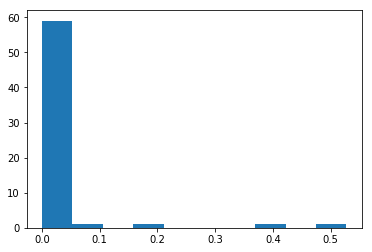

In [12]:
# Plot the degree distribution of the GitHub collaboration network
plt.hist(list(nx.betweenness_centrality(git_sub).values()))

In [13]:
a, b=list(nx.connected_component_subgraphs(git_sub))

In [14]:
a

In [19]:
largest_ccs = sorted(nx.connected_components(git_sub), key=lambda x: len(x))[-1]
len(largest_ccs)

62

In [22]:
from nxviz import MatrixPlot

In [29]:
T = nx.Graph()

In [30]:
T.add_nodes_from(largest_ccs)

<p id ='CspIV'><p>
### Case study part II: Visualization

<p id ='M'><p>
### MatrixPlot

<p id ='A'><p>
### ArcPlot

In [46]:
from nxviz.plots import ArcPlot

In [47]:
len(git_sub.nodes(data = True))

63

In [48]:
for n  in git_sub.nodes():
    # Calculate the degree of each node: G.node[n]['degree']
    git_sub.node[n]['degree'] = nx.degree(git_sub, n)

In [49]:
git_sub.nodes(data = True)

NodeDataView({'u41': {'degree': 5}, 'u69': {'degree': 7}, 'u96': {'degree': 13}, 'u156': {'degree': 13}, 'u297': {'degree': 13}, 'u298': {'degree': 5}, 'u315': {'degree': 15}, 'u322': {'degree': 19}, 'u435': {'degree': 7}, 'u440': {'degree': 4}, 'u640': {'degree': 12}, 'u655': {'degree': 5}, 'u698': {'degree': 13}, 'u821': {'degree': 12}, 'u863': {'degree': 13}, 'u901': {'degree': 5}, 'u914': {'degree': 3}, 'u1254': {'degree': 5}, 'u1407': {'degree': 3}, 'u1468': {'degree': 6}, 'u1908': {'degree': 12}, 'u2022': {'degree': 34}, 'u2066': {'degree': 13}, 'u2137': {'degree': 3}, 'u2289': {'degree': 5}, 'u2482': {'degree': 13}, 'u2552': {'degree': 13}, 'u2643': {'degree': 22}, 'u2737': {'degree': 5}, 'u2906': {'degree': 14}, 'u3083': {'degree': 12}, 'u3174': {'degree': 12}, 'u3231': {'degree': 3}, 'u3243': {'degree': 2}, 'u3271': {'degree': 5}, 'u3658': {'degree': 3}, 'u3974': {'degree': 12}, 'u3979': {'degree': 12}, 'u4159': {'degree': 13}, 'u4199': {'degree': 1}, 'u4329': {'degree': 5}, '

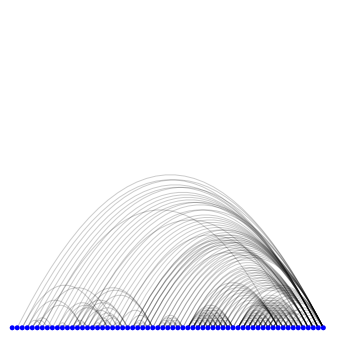

In [51]:
# Create the ArcPlot object: a
a = ArcPlot(graph=git_sub, node_order='degree')
a.draw()

<p id ='C'><p>
### CircosPlot

In [52]:
from nxviz.plots import CircosPlot

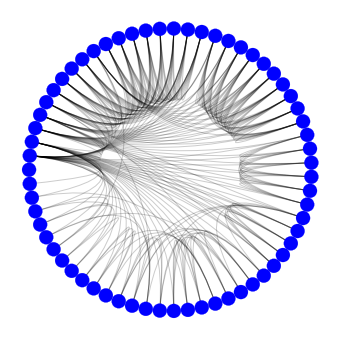

In [54]:
# Create the CircosPlot object: c
c = CircosPlot(graph= git_sub, node_order= 'degree')

# Draw the CircosPlot object to the screen
c.draw()
plt.show()

<p id ='CspIC'><p>
### Case study part III: Cliques

<p id ='Fc('><p>
### Finding cliques (I)
CLiques are group of node that are fully connected to one another.
While maximal clique that cannot be extended by adding another node in the graph.

In [66]:
# Calculate the maximal cliques in G: cliques
cliques = nx.find_cliques(git_sub)
cliques

<generator object find_cliques at 0x1a17cb6eb8>

In [63]:
list(cliques)

[['u10090', 'u2643', 'u440', 'u3271', 'u5693'],
 ['u2022', 'u10340', 'u9866', 'u322', 'u435', 'u8135', 'u10603', 'u7623'],
 ['u2022', 'u914', 'u3231'],
 ['u2022', 'u7418', 'u2643', 'u1468', 'u5337', 'u9869', 'u5993'],
 ['u2022', 'u298', 'u69', 'u5082', 'u41', 'u901'],
 ['u2022', 'u9869', 'u322'],
 ['u2022',
  'u315',
  'u96',
  'u10500',
  'u9997',
  'u297',
  'u7963',
  'u2066',
  'u698',
  'u863',
  'u2552',
  'u2482',
  'u156',
  'u2906'],
 ['u2022', 'u315', 'u69'],
 ['u2022', 'u4199'],
 ['u6081', 'u2643', 'u1407', 'u3658'],
 ['u4710',
  'u4953',
  'u821',
  'u3974',
  'u9869',
  'u322',
  'u4412',
  'u1908',
  'u3979',
  'u640',
  'u3174',
  'u3083',
  'u4159'],
 ['u4159', 'u3231'],
 ['u655', 'u914'],
 ['u655', 'u2643', 'u4513', 'u2137'],
 ['u655', 'u2906'],
 ['u4513', 'u69', 'u315'],
 ['u2289', 'u2643', 'u4329', 'u1254', 'u2737', 'u4761'],
 ['u3243', 'u2643', 'u3271'],
 ['u14964']]

In [67]:
len(list(cliques))

19

<p id ='Fc('><p>
### Finding cliques (II)
Let's continue by finding a particular maximal clique, and then plotting that clique.

In [70]:
sorted?

In [75]:
# Find the author(s) that are part of the largest maximal clique: largest_clique
largest_clique = sorted(nx.find_cliques(git_sub), key = lambda x: len(x), reverse=True)[0]

In [77]:
# Create the subgraph of the largest_clique: G_lc
G_lc = git_sub.subgraph(largest_clique)
G_lc

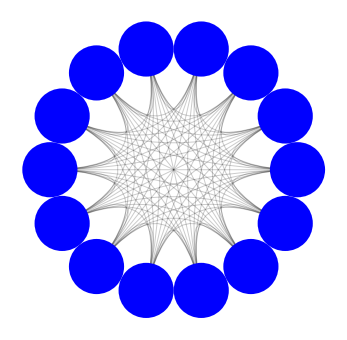

In [78]:
# Create the CircosPlot object
c = CircosPlot(G_lc)
c.draw()

<p id ='CspIFt'><p>
### Case study part IV: Final tasks

* Find important users.
* Find largest communities of collaborators.
* Build a collaboration recommendation system.

<p id ='Fic'><p>
### Finding important collaborators
 You'll now look at important nodes once more.
Here, you'll make use of the `degree_centrality()` and `betweenness_centrality()` functions in NetworkX to compute each of the respective centrality scores, and then use that information to find the "important nodes".
    
 In other words, your job in this exercise is to find the user(s) that have collaborated with the most number of users.



In [80]:
len(git.nodes())

56519

In [88]:
# Compute the degree centralities of G: deg_cent
deg_cent = nx.degree_centrality(git)
# Compute the maximum degree centrality: max_dc
max_dc = max(list(deg_cent.values()))
max_dc

0.005768073887964896

In [91]:
# Find the user(s) that have collaborated the most: prolific_collaborators
for n, dc in deg_cent.items():
    if (dc == max_dc):
        print(n, dc)

u741 0.005768073887964896


In [92]:
prolific_contributors = [n for n, dc in deg_cent.items() if dc ==max_dc]
prolific_contributors

['u741']

<p id ='Cec'><p>
### Characterizing editing communities
You're now going to combine what you've learned about the BFS algorithm and concept of maximal cliques to visualize the network with an ArcPlot.



In [97]:
git_sub = git.subgraph(('u41', 'u69', 'u96', 'u156', 'u297', 'u298', 'u315', 'u322', 'u435', 'u440', 'u640', 'u655', 'u698', 'u821', 'u863', 'u901', 'u914', 'u1254', 'u1407', 'u1468', 'u1908', 'u2022', 'u2066', 'u2137', 'u2289', 'u2482', 'u2552', 'u2643', 'u2737', 'u2906', 'u3083', 'u3174', 'u3231', 'u3243', 'u3271', 'u3658', 'u3974', 'u3979', 'u4159', 'u4199', 'u4329', 'u4412', 'u4513', 'u4710', 'u4761', 'u4953', 'u5082', 'u5337', 'u5693', 'u5993', 'u6081', 'u7418', 'u7623', 'u7963', 'u8135', 'u9866', 'u9869', 'u9997', 'u10090', 'u10340', 'u10500', 'u10603', 'u14964'))

In [100]:
# Identify the largest maximal clique: largest_max_clique
largest_max_clique = set(sorted(nx.find_cliques(git_sub), key=lambda x: len(x))[-1])

# Create a subgraph from the largest_max_clique: G_lmc
G_lmc = git.subgraph(largest_max_clique).copy()  



In [118]:
list(G_lmc)

['u96',
 'u10500',
 'u297',
 'u9997',
 'u7963',
 'u2022',
 'u2066',
 'u698',
 'u863',
 'u2552',
 'u156',
 'u2482',
 'u2906',
 'u315']

In [120]:
for node in list(G_lmc.nodes()):
    G_lmc.add_nodes_from(git_sub.neighbors(node))
    G_lmc.add_edges_from(zip([node]*len(list(git_sub.neighbors(node))), git_sub.neighbors(node) ))
    

In [122]:
G_lmc.nodes()

NodeView(('u96', 'u10500', 'u297', 'u9997', 'u7963', 'u2022', 'u2066', 'u698', 'u863', 'u2552', 'u156', 'u2482', 'u2906', 'u315', 'u41', 'u69', 'u298', 'u322', 'u435', 'u901', 'u914', 'u1468', 'u5993', 'u7623', 'u8135', 'u10340', 'u3231', 'u2643', 'u5082', 'u4199', 'u9869', 'u9866', 'u7418', 'u5337', 'u10603', 'u655', 'u4513', 'u3174', 'u3974', 'u4953', 'u640', 'u4412', 'u4159', 'u1908', 'u3979', 'u821', 'u3083', 'u4710', 'u440', 'u1254', 'u1407', 'u2137', 'u2289', 'u10090', 'u5693', 'u4329', 'u4761', 'u6081', 'u2737', 'u3658', 'u3243', 'u3271'))

In [123]:
# Record each node degree centrality score
for n in G_lmc.nodes():
    G_lmc.node[n]['degree centrality'] = nx.degree_centrality(G_lmc)[n]
    

In [126]:
list(G_lmc.nodes(data = True))[:5]

[('u96', {'bipartite': 'users', 'degree centrality': 0.21311475409836067}),
 ('u10500', {'bipartite': 'users', 'degree centrality': 0.21311475409836067}),
 ('u297', {'bipartite': 'users', 'degree centrality': 0.21311475409836067}),
 ('u9997', {'bipartite': 'users', 'degree centrality': 0.21311475409836067}),
 ('u7963', {'bipartite': 'users', 'degree centrality': 0.21311475409836067})]

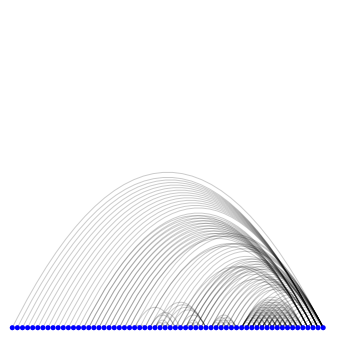

In [127]:
# Create the ArcPlot object: a
a = ArcPlot(G_lmc, node_order='degree centrality')

# Draw the ArcPlot to the screen
a.draw()
plt.show()

<p id ='Rcwhytet'><p>
### Recommending co-editors who have yet to edit together

In [140]:
from itertools import combinations
from collections import defaultdict

In [141]:
# Initialize the default dict
recommended = defaultdict(int)

In [142]:
print(recommended)
print(type(recommended))

defaultdict(<class 'int'>, {})
<class 'collections.defaultdict'>


In [143]:
for n, d in git_sub.nodes(data = True):
    for n1, n2 in combinations(git_sub.neighbors(n), 2):
        if not git_sub.has_edge(n1, n2):
            recommended[(n1, n2)]+=1

In [146]:
# Identify the top 10 pairs of users
all_counts = sorted(recommended.values())
top10_pairs = [pair for pair, count in recommended.items() if count > all_counts[-10]]
print(top10_pairs)


[('u655', 'u2022'), ('u2022', 'u4159')]


<p id ='Ft'><p>
### Final thoughts